<a href="https://colab.research.google.com/github/Soulpurr/hand_written_digits_classification/blob/main/handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [ ]:
#loading handwritten digit dataset from keras
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

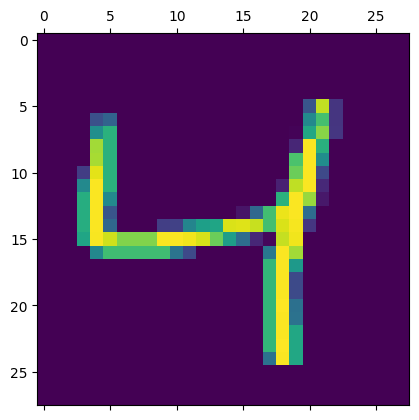

In [ ]:
#using matplotlib to view representation of image
plt.matshow(X_train[2])

In [ ]:
#converting this 2d array to 1d--- USING RESHAPE FXN OF PANDA
#28*28 as 2d array is of dimension 28*28
#dividing by 255 to scale values b/w 0 and 1
X_train_flatened=X_train.reshape(len(X_train),28*28)/255
X_test_flatened=X_test.reshape(len(X_test),28*28)/255
print(X_train_flatened.shape)
print(X_test_flatened.shape)

(60000, 784)
(10000, 784)


In [ ]:
tf_callbacks=tf.keras.callbacks.TensorBoard(log_dir="/content/drive/MyDrive/logs",histogram_freq=1)

In [ ]:
#creating a simple neural network
model=keras.Sequential([
     #here we are adding layers we have used dense as we want each neuron to connect to every possible outcome 10 are the numbers and 784 is size of array
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatened,y_train,epochs=5,callbacks=[tf_callbacks])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4695 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2830 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2725 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2665 - accuracy: 0.9258


Mounted at /content/drive


In [ ]:
model.evaluate(X_test_flatened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2652 - accuracy: 0.9269


[0.2652355432510376, 0.9269000291824341]

In [ ]:
y_preds=model.predict(X_test_flatened)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_preds_label=[np.argmax(i) for i in y_preds]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_preds_label)


Text(95.72222222222221, 0.5, 'truth')

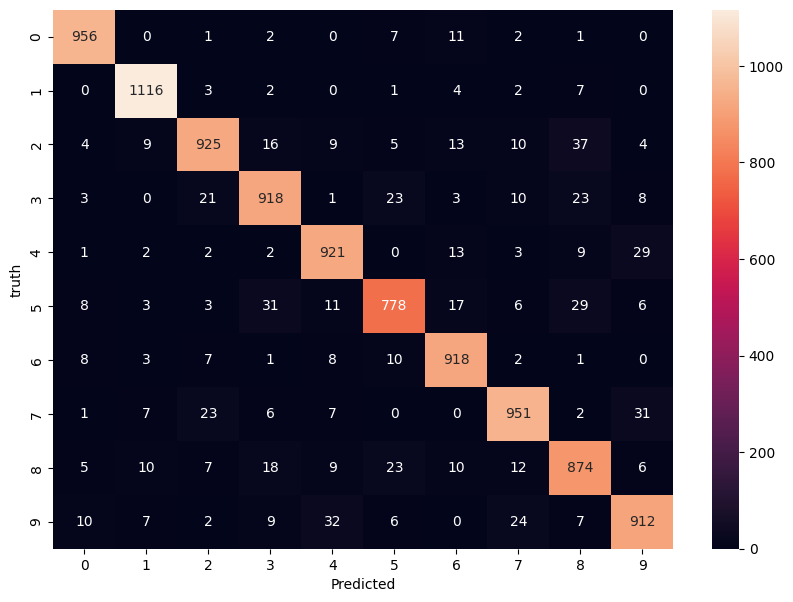

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('truth')

In [ ]:
#adding a hidden layer
model=keras.Sequential([
     #here we are adding layers we have used dense as we want each neuron to connect to every possible outcome 10 are the numbers and 784 is size of array
    keras.layers.Dense(200,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2375 - accuracy: 0.9313
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0990 - accuracy: 0.9699
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0668 - accuracy: 0.9795
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0471 - accuracy: 0.9857
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0355 - accuracy: 0.9893


In [ ]:
model.evaluate(X_test_flatened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0711 - accuracy: 0.9760


[0.0711241289973259, 0.9760000109672546]

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-11-19 07:49:54.129750: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-19 07:49:54.129863: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-19 07:49:54.129908: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-19 07:49:56.003397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorf